# Lets Play Cricket - IPL Exploration Analysis

Anybody who is a cricket Fan should surely try to analyse this dataset as it would help you in learning with a fun factor. I have tried my best to keep this notebook as simple as possible so that even a beginner can understand it easily. At the same time I have made efforts to analyse the dataset in different aspects effectively. I will keep updating the notebook as and when I come up with new things. Hope you like it!!!

![chec](https://cdn.zeebiz.com/sites/default/files/styles/zeebiz_850x478/public/2018/04/08/33887-ipl-official-twitter-account1.jpg?itok=alCgF7G6)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns# data visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ipl/deliveries.csv
/kaggle/input/ipl/matches.csv


In [2]:
delivery_data=pd.read_csv('/kaggle/input/ipl/deliveries.csv') # Bowl by Bowl data

match_data=pd.read_csv('/kaggle/input/ipl/matches.csv')# IPL(Indian premier League) Match Data from 2008 and 2016.

In [3]:
# print(match_data.shape)


In [4]:
match_data.head()
# match_data.loc[match_data.season==2017]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Work Starts

In [5]:
biggest_win=match_data['win_by_runs'].max()
teams_biggest_win=[]

f=match_data.loc[match_data['win_by_runs']==biggest_win]

teams_biggest_win.append((str(f['season'].tolist()[0])))

teams_biggest_win.append((str(f['venue'].tolist()[0])))

teams_biggest_win.append(str(f['team1'].tolist()[0]))

teams_biggest_win.append(str(f['team2'].tolist()[0]))


teams_biggest_win.append(str(f['winner'].tolist()[0]))


tie_matches_no=match_data.loc[match_data['result']=='tie']



In [6]:
f=match_data.loc[match_data['dl_applied']==1]
season_number=f['season'].value_counts()
dl_stadium=f['venue'].value_counts()

# Facts for <font color='red'>IPL</font>

1. Biggest win in terms of run margin was witnessed in Season of **2017** where **Mumbai Indians** won by **146** runs against **Delhi Daredevils** at **Feroz Shah Kotla**
2. From 2008 to 2017 only **7** Matches have Tied in **IPL**.
3. Since 2008 to 2017 only **16** Matches have been Decided on Duckworth Lewis Method and in 2016 highest matches were decided by this System that counted to 4.
4. **M Chinnaswamy Stadium** and **Eden Gardens** are the Venues where highest macthes have been Decided on DL Method (**3 each**).

# 7 Most Played venue in the History of IPL from 2008 to 2017

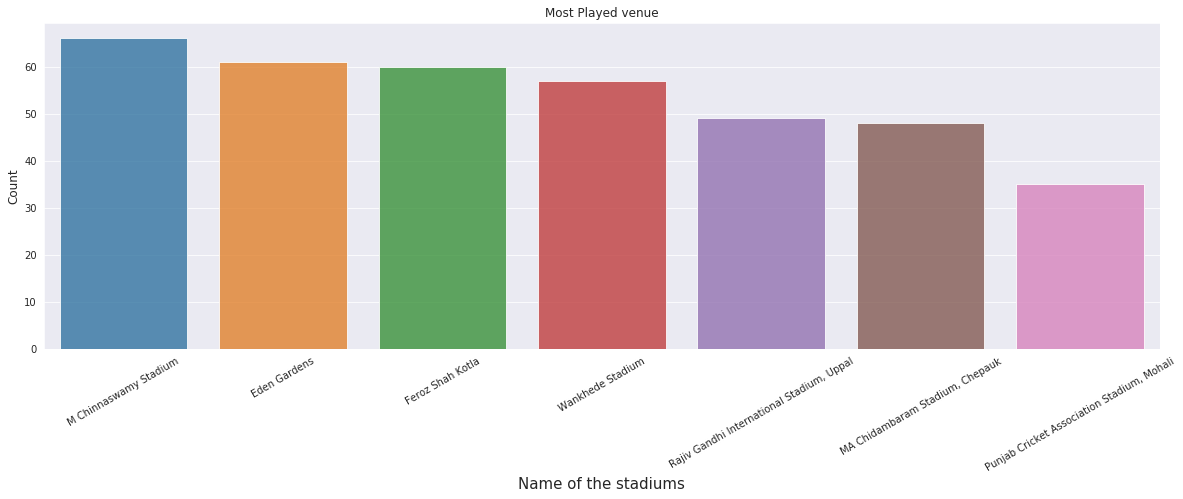

In [7]:
sns.set_style("darkgrid")# to make background with grid
ls=match_data['venue'].value_counts().sort_values(ascending=False)
ls=ls[:7]
plt.figure(figsize=(20,6))
Most_Played =sns.barplot(ls.index, ls.values, alpha=0.8)

plt.title('Most Played venue')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Name of the stadiums', fontsize=15)
Most_Played.set_xticklabels(rotation=30,labels=ls.index,fontsize=10)
plt.show()


This shows **M Chinnaswamy stadium** has hosted most matches in the History of IPL

# Most Player of the Matches across 9 Seasons

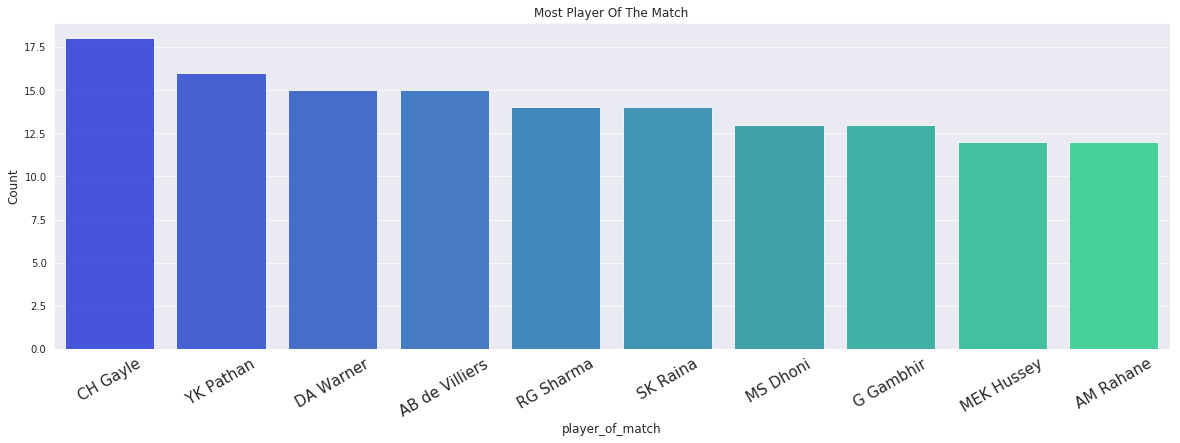

In [8]:
man_of_match=match_data['player_of_match'].value_counts()
man_of_match=man_of_match[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(20,6))
man_of_matches=sns.barplot(man_of_match.index, man_of_match.values, alpha=0.8,palette='winter')
plt.title('Most Player Of The Match')
plt.ylabel('Count', fontsize=12)
plt.xlabel('player_of_match', fontsize=12)
man_of_matches.set_xticklabels(rotation=30,labels=man_of_match.index,fontsize=15)
plt.show()

**Chris Gayle** has recived most man of the matches from 2008 to 2017

# Matches Played across each season

Text(0.5, 0, 'Season')

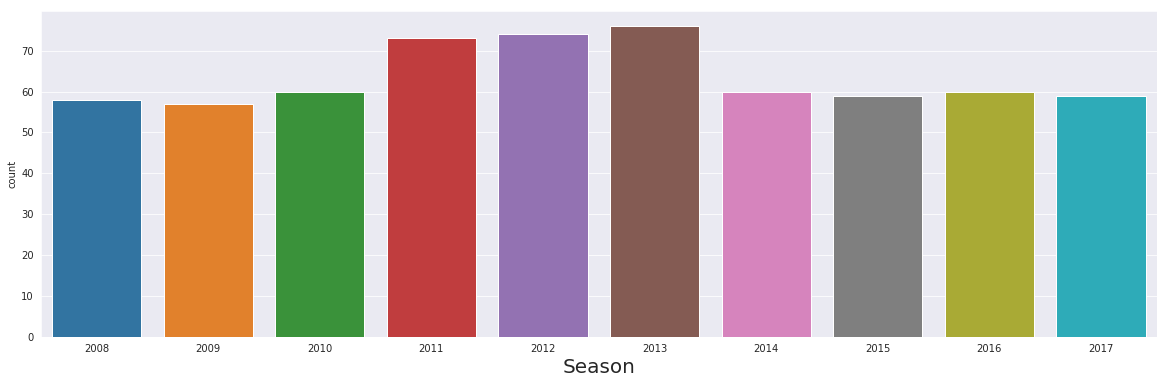

In [9]:
plt.figure(figsize=(20,6))
season=sns.countplot(x='season',data=match_data)
plt.xlabel('Season',fontsize=20)

This Shows Most Matches were played in the **2013** Season

# Most Favourite Umpires

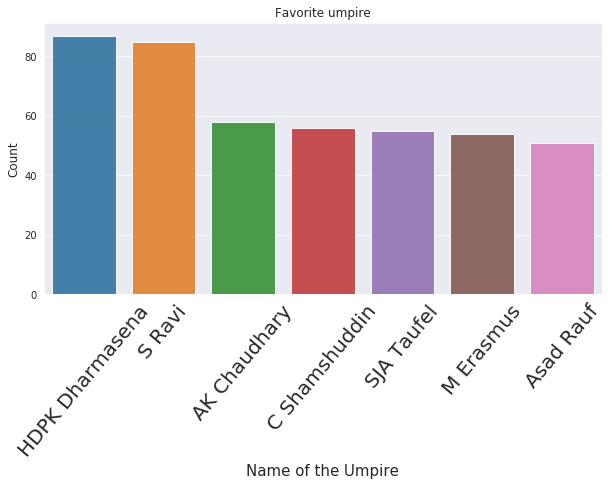

In [10]:
ump=pd.concat([match_data['umpire1'],match_data['umpire2']]).value_counts().sort_values(ascending=False)
ump=ump[:7]
plt.figure(figsize=(10,5))
Most_umpired =sns.barplot(x=ump.index, y=ump.values, alpha=0.9)

plt.title('Favorite umpire')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Name of the Umpire', fontsize=15)
Most_umpired.set_xticklabels(rotation=50,labels=ump.index,fontsize=20)
plt.show()




This shows that **Dharamsena** and **S Ravi** were the favourite Umpires.


# Stadium Wise Analysis for Most Played 6 Venues

##  *Feroz Shah Kotla*

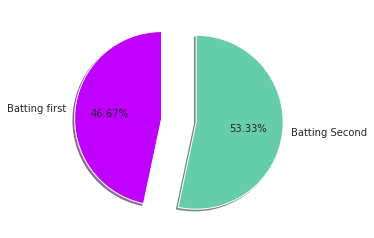

In [11]:
Delhi_stadium=match_data.loc[(match_data['venue']=='Feroz Shah Kotla') ]
Delhi_stadium_win_by_runs=Delhi_stadium[Delhi_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(Delhi_stadium_win_by_runs),len(Delhi_stadium)-len(Delhi_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#bf00ff','#66CDAA'])
plt.show()

This Shows that **Batting Second** is Slightly Preferrable on **Feroz Shah Kotla**

##  *Eden Gardens*

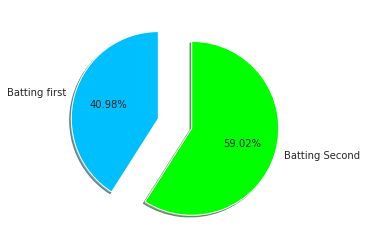

In [12]:
Kolkata_stadium=match_data.loc[(match_data['venue']=='Eden Gardens') ]
Kolkata_stadium_win_by_runs=Kolkata_stadium[Kolkata_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(Kolkata_stadium_win_by_runs),len(Kolkata_stadium)-len(Kolkata_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#00bfff','#00ff00'])
plt.show()

Batting Second on **Eden Gardens** is Clearly Favourable

## *Wankhede Stadium*

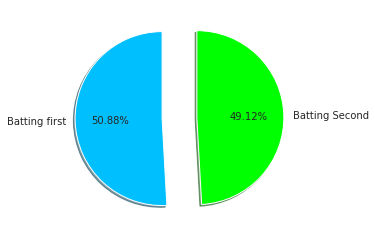

In [13]:
Mumbai_stadium=match_data.loc[(match_data['venue']=='Wankhede Stadium') ]
Mumbai_stadium_win_by_runs=Mumbai_stadium[Mumbai_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(Mumbai_stadium_win_by_runs),len(Mumbai_stadium)-len(Mumbai_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#00bfff','#00ff00'])
plt.show()

This shows it's almost equal if a Teams Bat's First or Bowl's First at **Wankhede Stadium**

## *M Chinnaswamy Stadium*

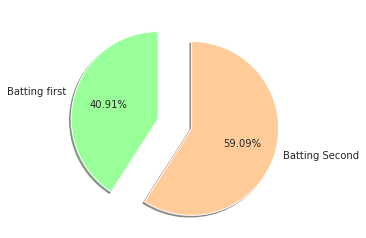

In [14]:
M_Chinnaswamy_Stadium=match_data.loc[(match_data['venue']=='M Chinnaswamy Stadium') ]
M_Chinnaswamy_Stadium_win_by_runs=M_Chinnaswamy_Stadium[M_Chinnaswamy_Stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(M_Chinnaswamy_Stadium_win_by_runs),len(M_Chinnaswamy_Stadium)-len(M_Chinnaswamy_Stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#99ff99','#ffcc99'])
plt.show()

Batting Second on **M Chinnaswamy Stadium** has Better win Percentage

## *MA Chidambaram Stadium, Chepauk*

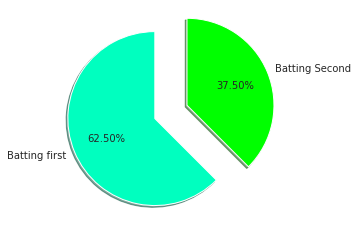

In [15]:

Chennai_stadium=match_data.loc[(match_data['venue']=='MA Chidambaram Stadium, Chepauk') ]
Chennai_stadium_win_by_runs=Chennai_stadium[Chennai_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(Chennai_stadium_win_by_runs),len(Chennai_stadium)-len(Chennai_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#00ffbf','#00ff00'])
plt.show()

Batting Fisrt at **MA Chidambaram Stadium, Chepauk** is clearly a Good Option

# Analysis for year 2017

Is **Toss Winner** Also the Match Winner? For the year 2017

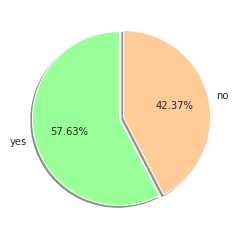

In [16]:
match_2017=match_data[match_data['season']==2017]
df=match_2017[match_2017['toss_winner']==match_2017['winner']]
slices=[len(df),(59-len(df))]# because Toal 59 matches were played in 2017
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.2f%%',colors=['#99ff99','#ffcc99'])
plt.show()

**YES**,In 2017 if a team won the **toss** they had slightly better chances to win the match

Trends in 2017 after **winning the toss**.

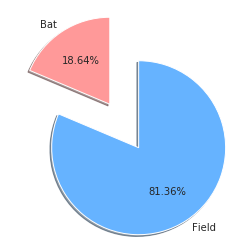

In [17]:
dfs=match_data[(match_data['toss_decision']=='field') & (match_data['season']==2017) ]
labels=['Bat','Field']
slices=[59-len(dfs),len(dfs)]
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0.2,0.4),autopct='%1.2f%%',colors=['#ff9999','#66b3ff'])
plt.show()

Teams winning toss in 2017 majorly decide to **Field** first.

## <font color='red'>**Crucial**</font> observation 

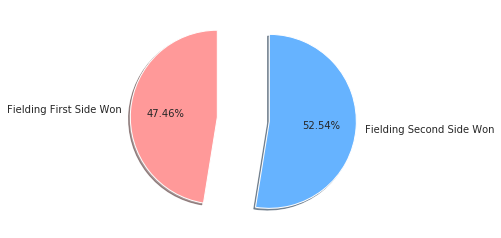

In [18]:

dfd=match_2017[(match_2017['toss_decision']=='field') & (match_2017['toss_winner']==match_2017['winner'])]
labels=['Fielding First Side Won','Fielding Second Side Won']
slices=[len(dfd),59-len(dfd)]
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0.2,0.4),autopct='%1.2f%%',colors=['#ff9999','#66b3ff'])
plt.show()

Sides Fielding Second Side Won More Matches in 2017

# <font color='red'> Team1 </font> vs <font color='red'> Team 2 </font>

In [19]:
def comparator(team1):
    teams=list(match_data.team1.unique())# you can take team2 here also 
    teams.remove(team1)
    opponents=teams.copy()
    mt1=match_data[((match_data['team1']==team1)|(match_data['team2']==team1))]
    for i in opponents:
        mask = (((mt1['team1']==i)|(mt1['team2']==i)))&((mt1['team1']==team1)|(mt1['team2']==team1))# each time comparing each opponent team and the team we are looking for
#         print(mask)
        mt2 = mt1.loc[mask, 'winner'].value_counts().to_frame().T# to_frame to convert to DataFrame and T is used to Transpose
        print(mt2)


In [20]:
comparator('Mumbai Indians')

        Mumbai Indians  Sunrisers Hyderabad
winner               5                    5
        Mumbai Indians  Gujarat Lions
winner               2              2
        Rising Pune Supergiant  Mumbai Indians
winner                       3               1
        Mumbai Indians  Royal Challengers Bangalore
winner              13                            8
        Mumbai Indians  Kolkata Knight Riders
winner              16                      5
        Mumbai Indians  Delhi Daredevils
winner              11                 9
        Mumbai Indians  Kings XI Punjab
winner              10               10
        Mumbai Indians  Chennai Super Kings
winner              12                   10
        Mumbai Indians  Rajasthan Royals
winner              10                 6
        Mumbai Indians  Deccan Chargers
winner               6                4
        Kochi Tuskers Kerala
winner                     1
        Mumbai Indians  Pune Warriors
winner               5              1


# <font color='red'>BALL BY BALL</font> OBSERVATION

In [21]:
print(delivery_data.shape)
print(delivery_data.columns)

(150460, 21)
Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [22]:
delivery_data.batting_team.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [23]:
delivery_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


## Definition of Maiden over
In cricket, an over consists of six consecutive legal deliveries bowled from one end of a cricket pitch to the player batting at the other end, almost always by a single bowler.

A **maiden over** is an over in which no runs are scored that count against the bowler (so leg byes and byes may be scored as they are not counted against the bowler).

https://en.wikipedia.org/wiki/Over_(cricket)

# MOST MAIDEN OVERS IN <font color='red'> 2017</font>

In [24]:

match_data.loc[match_data.season==2017].shape# this shows 59 matches were played in season 2017

most_maidens=delivery_data.groupby(['match_id','inning','over'])

# most_maidens.first()
list_of_most_maidens=[]
for match in range(1,60): # to iterate over each match total 59 matches
    for inning in range(1,3):# to iterate over each innings there are 2 innings in a match
        for over in range(1,21):# to iterate over maximum 20 overs in an innings
            
            try:# try block beacuse not every inning or every match is perfectly divided into 2 innings of 20 overs each in some matches due to rain or some other reason overswere reduced 
                #or even innings was dismissed
                if ((most_maidens.get_group((match,inning,over))['wide_runs'].sum()>0) + 
                    (most_maidens.get_group((match,inning,over))['noball_runs'].sum()>0)==most_maidens.get_group((match,inning,over))['total_runs'].sum()):
                    bowler=list(most_maidens.get_group((match,inning,over))['bowler'].unique())[0]
                    list_of_most_maidens.append(bowler)
                    
                    
                else:
                    pass
                
            except:
                continue


from statistics import mode 
def most_common(List): 
    return(mode(List)) 
    
print(str(most_common(list_of_most_maidens))+ " bowled most " + str(list_of_most_maidens.count(most_common(list_of_most_maidens))) + " maiden overs in 2017")                      


JD Unadkat bowled most 3 maiden overs in 2017


## Jaidev Unadkat

![jaidev](https://iplstatic.s3.amazonaws.com/players/284/86.png)